<a href="https://colab.research.google.com/github/cgrundman/nuclear-magnetic-resonance/blob/master/pattern_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pattern Recognizer

This is the last stage of the Continuous Wave Nuclear Magnatic Resonance Project found at: https://github.com/cgrundman/nuclear-magnetic-resonance. Found in this documentation is merely the information crucial to creating and evaluating the ML model. For more details, please refer to the ``readme`` in the above link.

## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
from google.colab import userdata
import os

## Load Data

In [2]:
# Connect to Kaggle
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
# Load dataset from Kaggle
!kaggle datasets download -d christiangrundman/simulated-nmr-data
!unzip -q "simulated-nmr-data.zip"

Dataset URL: https://www.kaggle.com/datasets/christiangrundman/simulated-nmr-data
License(s): MIT
 89% 113M/128M [00:01<00:00, 109MB/s]  
100% 128M/128M [00:01<00:00, 107MB/s]


## Visualize Data

In [4]:
train_dir = "/content/processed_nmr_data/"

Text(0.5, 1.08, 'Material Samples')

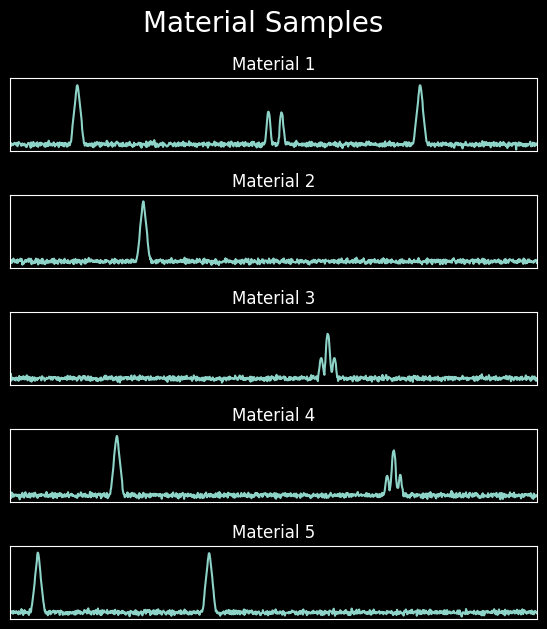

In [5]:
# Plot data examples
plt.style.use('dark_background')
fig, axs = plt.subplots(5, 1, figsize=(6, 6))
fig.tight_layout()

for i, row in enumerate(axs):
    file = f"0000_Material_{i+1}.txt"
    freq = np.linspace(16, 20, num=1200)
    load_data = np.loadtxt(train_dir + file)
    row.title.set_text(f"Material {i+1}")
    row.plot(freq, load_data)
    row.set_xticks([])
    row.set_yticks([])
    row.set_xlim([16, 20])
    row.set_ylim([.25, 3])
plt.suptitle("Material Samples", fontsize=20, y='1.08')

## Process Data

In [6]:
# Merge data set into a single list
data = []
mat_labels = []
directory = '/content/processed_nmr_data'

import glob

filelist = glob.glob(os.path.join(directory, '*.txt'))
for file in sorted(filelist):
  # path = directory + '/' + file
  # single_file = pd.read_csv(path,
  #                           names=[path[33:-4]])
  # data.append(single_file)

  mat_labels.append(int(file[-5:-4]))

  text_file = open(file, "r")
  lines = text_file.read().split('\n')
  data.append(lines)
  text_file.close()

# Display data sizes
print(f"Rows: {len(data)}")
print(f"Columns: {len(data[0])}")

Rows: 10000
Columns: 1201


In [7]:
# Convert datatypes
for i in range(len(data)):
  for j in range(len(data[i])-1):
    data[i][j] = round(float(data[i][j]), 4)

In [8]:
# Convert list into a dataframe
df = pd.DataFrame(data) # , columns=headers)
# df.astype('float')
df.insert(0, "Material", mat_labels)

df.dtypes # .round(4) # Scale the data

Material      int64
0           float64
1           float64
2           float64
3           float64
             ...   
1196        float64
1197        float64
1198        float64
1199        float64
1200         object
Length: 1202, dtype: object

In [9]:
# Display head of data
df.head()

,Material,0,1,2,3,4,5,6,7,8,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,1,0.5912,0.5019,0.5445,0.4486,0.5106,0.5202,0.5121,0.4748,0.5110,...,0.4586,0.4535,0.5537,0.4456,0.4990,0.5132,0.4778,0.5380,0.5340,
1,2,0.5507,0.4990,0.4872,0.5531,0.4385,0.4913,0.5573,0.5309,0.6070,...,0.5009,0.4810,0.5206,0.5489,0.5385,0.5565,0.5261,0.4308,0.4614,
2,3,0.4539,0.4849,0.6732,0.4154,0.5122,0.5284,0.4783,0.4723,0.5169,...,0.4829,0.5469,0.5722,0.4887,0.4256,0.4858,0.4082,0.5145,0.4993,
3,4,0.4973,0.4962,0.3938,0.5349,0.6080,0.5870,0.4456,0.5366,0.5328,...,0.5678,0.4818,0.5099,0.4335,0.4759,0.4971,0.5115,0.4611,0.4743,
4,5,0.5401,0.5017,0.4963,0.4812,0.5436,0.4783,0.5239,0.4485,0.5558,...,0.4290,0.4970,0.4934,0.5586,0.5033,0.4950,0.5211,0.5167,0.4626,


### Train/Test/Validate Split

It is normally good practice to shuffle the data into its subsets. The data is generated using a random values. Therefore, this data can be split in order, to preserve te the number of each material within the test/train/validate splits.

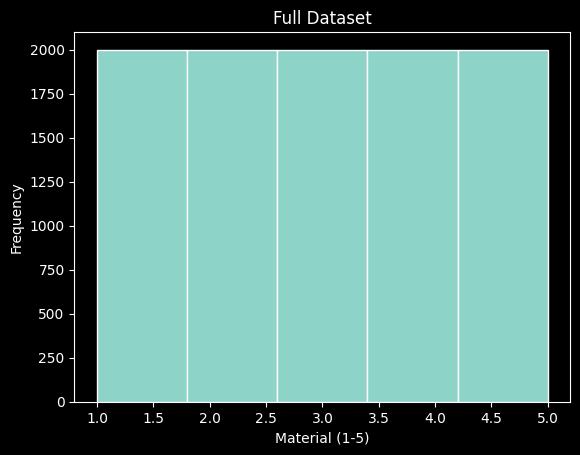

In [14]:
# Display historgram of full dataset
hist = df.hist(column='Material',
               bins=5,
               grid=False,
               edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Full Dataset")

In [11]:
# Define 80/10/10 Train/Test/Valitation split
training_size = int(len(df)*0.80)
test_size = int(len(df)*0.10)

#Defining the Length of data.
data_len = len(df)

# Defining Training and Testing Data.
train = df[0:training_size]
test = df[training_size:data_len-test_size]
validate = df[data_len-test_size:data_len]

In [12]:
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))
print("Validation length --> ", len(validate))

total length of data -->  10000
Train length -->  8000
Test length -->  1000
Validation length -->  1000


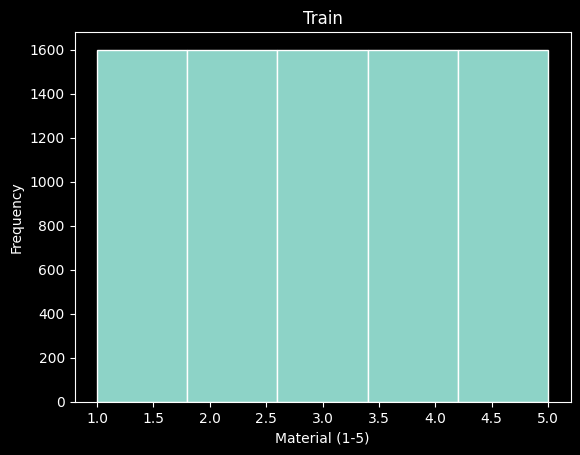

In [15]:
# Display train historgram
hist = train.hist(column='Material',
                  bins=5,
                  grid=False,
                  edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Train")

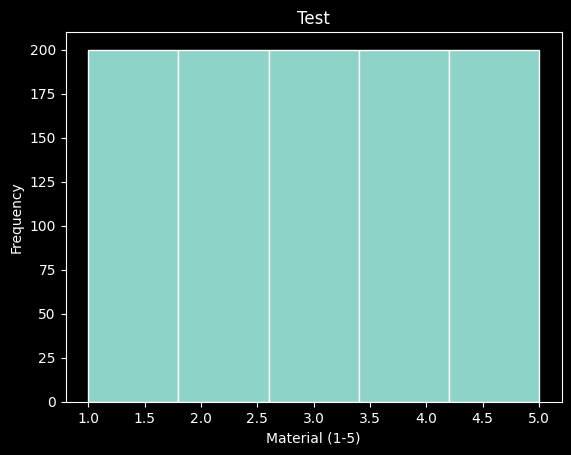

In [16]:
# Display test historgram
hist = test.hist(column='Material',
                 bins=5,
                 grid=False,
                 edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Test")

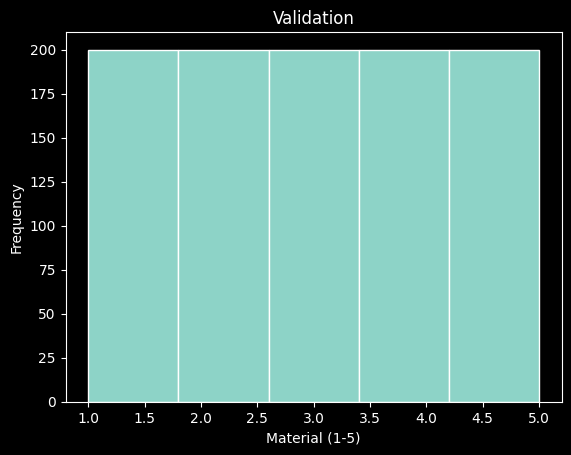

In [17]:
# Display test historgram
hist = validate.hist(column='Material',
                     bins=5,
                     grid=False,
                     edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Validation")

## Deep Learning Models

This dataset will be tested for 3 different models:
1. Neural Network
2. Recurent Neural Network
3. Long Short-Term Memory

This is to create a baseline for how this data can be learned from. Each model has a different architecture, so it will be seen how the different models learn from the data.

### Model 1 - Deep Neural Network (NN)

In [31]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

In [27]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = Sequential([
    Dense(1200, activation="relu"),
    Dense(5, activation="softmax"),
])

# 2. Compile the model
model_1.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
# history_1 = model_1.fit("training data",
#                         "tf.one_hot(train_labels, depth=10)",
#                         epochs=2,
#                         something="validation_data")

In [29]:
# Get a model summary
model_1.summary()

In [ ]:
# Evaluate the model
model_1.evaluate("test data")

### Model 2 - Recurent Neural Network (RNN)

In [30]:
# Create the model
model_2 = Sequential([
    SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(1200, 1)),
    Dropout(0.2),
    SimpleRNN(units=50, activation="tanh", return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=50, activation="tanh", return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=50),
    Dropout(0.2),
    Dense(5, activation="softmax")
])

# Compile the model
model_2.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
# history_2 = model_2.fit("training data",
#                         "tf.one_hot(train_labels, depth=10)",
#                         epochs=2,
#                         something="validation_data")

In [ ]:
# Get a model summary
model_2.summary()

In [ ]:
# Evaluate the model
model_2.evaluate("test data")

### Model 3 - Long Short-Term Memory (LSTM)

In [ ]:
# Create the model
model_3 = Sequential([
    LSTM(units=50, activation="tanh", return_sequences=True, input_shape=(1200, 1)),
    Dropout(0.2),
    LSTM(units=50, activation="tanh", return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, activation="tanh", return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(5, activation="softmax")
])

# Compile the model
model_3.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
# history_3 = model_3.fit("training data",
#                         "tf.one_hot(train_labels, depth=10)",
#                         epochs=2,
#                         something="validation_data")

In [ ]:
# Get a model summary
model_3.summary()

In [ ]:
# Evaluate the model
model_3.evaluate("test data")

## Compare Model Performance

In [ ]:
# Create Comparison of Models

## Conclusion

In [ ]:
# TODO conclude results of experiment